In [1]:
import torch
print(torch.__version__)

2.0.0


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Creating a dataframe that consists of `image_id`, `image_name` and `category_id`

In [3]:
def modify_box(box):
    # Adding x_min to x_max and y_min to y_max
    box[2] = box[0] + box[2]
    box[3] = box[1] + box[3]
    return box

In [26]:
import os
import json
import pandas as pd
import glob

def create_df(folder_path):
    '''
    Args:
        folder_path: Provide the path of the folder where and annotations.json is present

    return: dataframe
    '''
    json_file = glob.glob(f"{folder_path}/*.json")
    annot_file = open(json_file[0])
    annot = json.load(annot_file)
    annot_ids = []
    annot_image_ids = []
    annot_category_ids = []
    bbox = []

    NUM_CLASSES = len(annot['categories'])

    for ids in range(len(annot['annotations'])):
        annot_ids.append(annot['annotations'][ids]['id'])
        annot_image_ids.append(annot['annotations'][ids]['image_id'])
        annot_category_ids.append(annot['annotations'][ids]['category_id'])
        bbox.append(annot['annotations'][ids]['bbox'])

    image = {}
    for ids in range(len(annot['images'])):
        image.update({annot['images'][ids]['id'] : annot['images'][ids]['file_name']})

    df = pd.DataFrame({
    'id': annot_ids,
    'image_id': annot_image_ids,
    'category_id': annot_category_ids,
    'bbox': bbox
    })

    df['image_filename'] = df['image_id'].map(image)
    df['bbox'] = df['bbox'].apply(modify_box)
    df['category_id'] = df['category_id'] + 1

    return df, NUM_CLASSES

In [27]:
train_df, NUM_CLASSES = create_df('/kaggle/input/traffic-signs/train')

In [28]:
train_df

,id,image_id,category_id,bbox,image_filename
0,0,0,8,"[93, 121, 358, 384.5]",00000_00005_00010_png.rf.00b7dad32993f94b44235...
1,1,1,5,"[68, 59, 369, 364.5]",00007_00014_00016_png.rf.00659738f01377eae3328...
2,2,2,2,"[191, 58, 227, 78]",000962_JPG_jpg.rf.000e938b3d508690aa01a2b47d11...
3,3,3,2,"[220, 86, 237.5, 97]",FisheyeCamera_1_00206_png.rf.00839887cbdb7f5fd...
4,4,3,2,"[290, 104, 302, 113]",FisheyeCamera_1_00206_png.rf.00839887cbdb7f5fd...
...,...,...,...,...,...
4293,4293,3526,13,"[98, 103, 334, 335]",00004_00036_00003_png.rf.ffb59c0df3db470a10139...
4294,4294,3527,9,"[122, 82, 340.5, 360.5]",00001_00030_00005_png.rf.ffdae2af318eebb9d2b4b...
4295,4295,3528,2,"[210, 160, 225.5, 204]",FisheyeCamera_1_00473_png.rf.fff78f0224751be1e...
4296,4296,3528,2,"[123, 164, 136.5, 204]",FisheyeCamera_1_00473_png.rf.fff78f0224751be1e...


In [29]:
val_df, NUM_CLASSES = create_df('/kaggle/input/traffic-signs/valid')
val_df

,id,image_id,category_id,bbox,image_filename
0,0,0,14,"[61, 55, 366, 370]",00005_00019_00023_png.rf.3fa9a988aa0486f9328a4...
1,1,1,2,"[159, 46, 255.5, 77]",000982_JPG_jpg.rf.3dd252db590da0f9bd0fbe123d59...
2,2,1,2,"[83, 180, 115, 193.5]",000982_JPG_jpg.rf.3dd252db590da0f9bd0fbe123d59...
3,3,2,16,"[183, 66, 355.5, 341]",road73_png.rf.3d3e70e98db37845a47dbf47ceb49047...
4,4,2,3,"[77, 131, 131.5, 263]",road73_png.rf.3d3e70e98db37845a47dbf47ceb49047...
...,...,...,...,...,...
939,939,796,13,"[58, 168, 368.5, 351.5]",000460_jpg.rf.3be56562d86269ad806603bb1cdb710c...
940,940,797,8,"[117, 107, 338.5, 335.5]",00000_00005_00004_png.rf.3b1da84bffee4d187959b...
941,941,798,9,"[45, 47, 375, 376.5]",00001_00007_00010_png.rf.3b97ab40ade2235e54b1c...
942,942,799,2,"[183, 205, 186, 207]",FisheyeCamera_1_00040_png.rf.3cecfad4b5ce1e131...


In [30]:
NUM_CLASSES

16

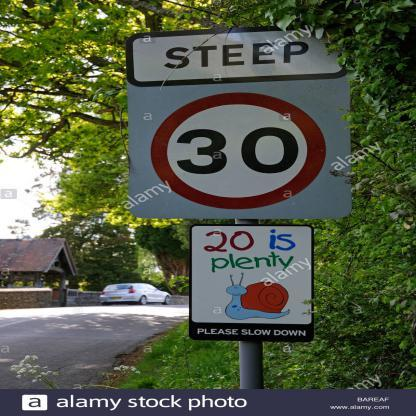

In [31]:
from PIL import Image
img = Image.open('/kaggle/input/traffic-signs/train/000005_jpg.rf.d730849ae93a7c211a7c8f57ed851028.jpg')
img

In [32]:
import  numpy as np
img_as_array = np.asarray(img)
img_as_array.shape

(416, 416, 3)

In [33]:
dir = '/kaggle/input/traffic-signs/'
train_dir = dir + 'train/'
val_dir = dir + 'valid/'

In [34]:
train_dir, val_dir

('/kaggle/input/traffic-signs/train/', '/kaggle/input/traffic-signs/valid/')

### Creating `train_data`

In [35]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [36]:
import os
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from PIL import Image

class CustomObjectDetectionDataset(torch.utils.data.Dataset):
    def __init__(self, df, root, device='cuda', transform=None):
        self.root = root
        self.transform = transform
        self.df = df
        self.device = device

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # Load image
        img_filename = self.df.iloc[idx]['image_filename']
        img_path = os.path.join(self.root, img_filename)
        img = Image.open(img_path)

        # Load bounding box and category information
        # Modify this part based on how your bounding box and category data is structured
        bbox = self.df.iloc[idx]['bbox']
        category = self.df.iloc[idx]['category_id']

        # Apply transformations
        if self.transform:
            img = self.transform(img)

        img = img.to(self.device)
        bbox = torch.tensor(bbox, device=self.device, dtype=torch.float32)
        category = torch.tensor(category, dtype = torch.int64, device = self.device)
        return img, [{'boxes': bbox, 'labels': category}]

# Define your data transformations
data_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(([0.485, 0.456, 0.406]), ([0.229, 0.224, 0.225]))
    # Add other transformations if needed
])

In [37]:
train_data = CustomObjectDetectionDataset(df = train_df, root=train_dir, device=device, transform=data_transforms)
val_data = CustomObjectDetectionDataset(df = val_df, root=val_dir, device=device, transform=data_transforms)

In [67]:
BATCH_SIZE = 1

train_dataloader = DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_dataloader = DataLoader(
    val_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

In [68]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

model_0 = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights='DEFAULT').to(device)
in_features = model_0.roi_heads.box_predictor.cls_score.in_features
model_0.roi_heads.box_predictor = FastRCNNPredictor(in_features, NUM_CLASSES+1)

In [69]:
# len(list(train_data)), len(list(val_data))

In [70]:
from torchinfo import summary
summary(model_0, input_size=[1, 3, 416, 416])

Layer (type:depth-idx)                                  Output Shape              Param #
FasterRCNN                                              [100, 4]                  --
├─GeneralizedRCNNTransform: 1-1                         [1, 3, 800, 800]          --
├─BackboneWithFPN: 1-2                                  [1, 256, 13, 13]          --
│    └─IntermediateLayerGetter: 2-1                     [1, 2048, 25, 25]         --
│    │    └─Conv2d: 3-1                                 [1, 64, 400, 400]         (9,408)
│    │    └─FrozenBatchNorm2d: 3-2                      [1, 64, 400, 400]         --
│    │    └─ReLU: 3-3                                   [1, 64, 400, 400]         --
│    │    └─MaxPool2d: 3-4                              [1, 64, 200, 200]         --
│    │    └─Sequential: 3-5                             [1, 256, 200, 200]        (212,992)
│    │    └─Sequential: 3-6                             [1, 512, 100, 100]        1,212,416
│    │    └─Sequential: 3-7              

In [71]:
optimizer = torch.optim.Adam(params=model_0.parameters(), lr = 0.001)

In [ ]:
from tqdm.auto import tqdm
torch.manual_seed(42)
NUM_EPOCHS = 20

for epoch in tqdm(range(NUM_EPOCHS)):
    print(f"---- Epoch: {epoch} ----")
    model_0.train()
    total_train_loss = 0
    for batch, (images, targets) in enumerate(train_dataloader):
        if batch % 100 == 0:
            print(f"batch: {batch}")

        train_loss_dict = model_0(images, targets)
#         print(f"Train loss dict: {train_loss_dict}")
        batch_loss = sum(loss for loss in train_loss_dict.values())
#         print(f"batch_loss: {batch_loss}")
        total_train_loss += batch_loss.item()  # Accumulate the total training loss
#         print(f"Total train loss: {total_train_loss}")
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()

    print(f"Train Loss: {total_train_loss:.5f}")

    # Evaluation phase
    model_0.eval()
    with torch.inference_mode():
        # Here you would calculate evaluation metrics instead of loss
        for images, _ in val_dataloader:  # Targets are not needed during inference
            val_predictions = model_0(images)
#             print(val_predictions)
            # Process val_predictions to calculate metrics like mAP, precision, recall, etc.

  0%|          | 0/20 [00:00<?, ?it/s]

---- Epoch: 0 ----
batch: 0
batch: 100
batch: 200
batch: 300
batch: 400
batch: 500
batch: 600
batch: 700
batch: 800
batch: 900
batch: 1000
batch: 1100
batch: 1200
batch: 1300
batch: 1400
batch: 1500
batch: 1600
batch: 1700
batch: 1800
batch: 1900
batch: 2000
batch: 2100
batch: 2200
batch: 2300
batch: 2400
batch: 2500
batch: 2600
batch: 2700
batch: 2800
batch: 2900
batch: 3000
batch: 3100
batch: 3200
batch: 3300
batch: 3400
batch: 3500
batch: 3600
batch: 3700
batch: 3800
batch: 3900
batch: 4000
batch: 4100
batch: 4200
Train Loss: 53382.21805
---- Epoch: 1 ----
batch: 0
batch: 100
batch: 200
batch: 300
batch: 400
batch: 500
batch: 600
batch: 700
batch: 800
batch: 900
batch: 1000
batch: 1100
batch: 1200
batch: 1300
batch: 1400
batch: 1500
batch: 1600
batch: 1700
batch: 1800
batch: 1900
batch: 2000
batch: 2100
batch: 2200
batch: 2300
batch: 2400
batch: 2500
batch: 2600
batch: 2700
batch: 2800
batch: 2900
batch: 3000
batch: 3100
batch: 3200
batch: 3300
batch: 3400
batch: 3500
batch: 3600
ba